**House Sales in King County, USA**

# Business Understanding

In [6]:
reset -sf

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


%matplotlib inline

# Data Mining

In [8]:
path = './data/house_price.csv'
df = pd.read_csv(path, index_col='id')

In [9]:
print('# of rows:',df.shape[0])
print('# of cols:',df.shape[1])
df.sample(2)

# of rows: 21597
# of cols: 20


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
3083000940  4/12/2015  341000.0         2        1.0         1040      4000   
1454100056  7/15/2014  355000.0         3        1.0         1600      5001   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
3083000940     1.0         0.0   0.0          3      6        1040   
1454100056     1.5         0.0   0.0          5      6        1080   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
3083000940           0.0      1914           NaN    98144  47.5753 -122.303   
1454100056         520.0      1930           0.0    98125  47.7232 -122.289   

            sqft_living15  sqft_lot15  
id                                     
3083000940           1740        4000  
1454100056           1340        5001

## Data Splitting

In [11]:
print('# of rows:',df.shape[0])
print('# of cols:',df.shape[1])
df.sample(2)

# of rows: 21597
# of cols: 20


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
2461900550  12/16/2014  500000.0         4       1.75         2040      6000   
9465910070   7/16/2014  480000.0         3       2.50         1940     10035   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
2461900550     1.0         0.0   0.0          5      7        1020   
9465910070     2.0         0.0   0.0          4      8        1940   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
2461900550        1020.0      1943           0.0    98136  47.5507 -122.383   
9465910070           0.0      1994           0.0    98072  47.7438 -122.172   

            sqft_living15  sqft_lot15  
id                                     
2461900550           1440        6000  
9465910070           2810        8333

## First Glance

In [12]:
df.sample(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
2722059075  8/11/2014  455000.0         3       2.75         2720     31314   
3876540410  4/13/2015  242000.0         3       2.25         1690      7292   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
2722059075     3.0         0.0   2.0          3      8        2720   
3876540410     1.0         0.0   0.0          3      7        1250   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
2722059075           0.0      1986           0.0    98042  47.3689 -122.163   
3876540410         440.0      1985           0.0    98003  47.2639 -122.303   

            sqft_living15  sqft_lot15  
id                                     
2722059075           2290       15188  
3876540410           1670        7747

In [13]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Column Name Description**
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning

## Seaborn NaN von David

In [ ]:
# check for na_values
nan = pd.DataFrame(df.isnull().sum(),columns=[‘Count’])
nan[‘Percentage’] = round(nan.Count/df.shape[0]*100,1)
print(nan[nan.Count!=0])
# show heatmap of all null values in the dataset
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap=“viridis”);

## Missing Data and Data Type

In [14]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

In [15]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Why is ` df['sqft_basement']` an object? 

In [16]:
print('df.sqft_basement DataType before change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType before change:  object


In [17]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False
    
for row in df['sqft_basement']:
    if not is_float(row):
        print(row) 

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


## Replace `?` in ` df['sqft_basement']` 

In [19]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [20]:
print(f'df.sqft_basement DataType after change: ',  df['sqft_basement'].dtypes)

df.sqft_basement DataType after change:  float64


## replace `NaN`in `df.view` with `0`

In [22]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
waterfront       2376        11.0
view               63         0.3
sqft_basement     454         2.1
yr_renovated     3842        17.8

In [23]:
df.view = df.view.fillna(0)

## replace `NaN`in `df.waterfront` with `0`

In [24]:
df.waterfront = df.waterfront.fillna(0)

In [25]:
missing = pd.DataFrame(df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/df.shape[0]*100,1)
missing[missing.Number!=0]

Number  Percentage
sqft_basement     454         2.1
yr_renovated     3842        17.8

## replace `0` in `df.yr_renovated` with Na

<AxesSubplot:>

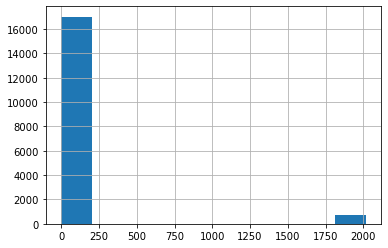

In [26]:
df.yr_renovated.hist()

In [190]:
df.yr_renovated.replace(0, np.nan, inplace=True)
#df.yr_renovated.fillna(0, inplace = True)
#df.yr_renovated = df.yr_renovated.astype('int64', error='ignore')

<AxesSubplot:>

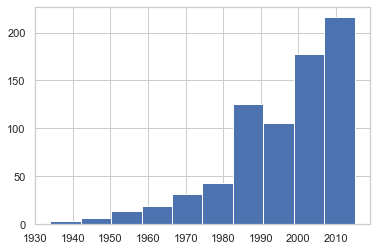

In [191]:
df.yr_renovated.hist()

## dtype(object) --> dtype(date)

In [29]:
var = 'date'
print(f'df.{var} DataType before change: ',  df[var].dtypes)

df.date DataType before change:  object


In [30]:
df.date.head(5)

id
7129300520    10/13/2014
6414100192     12/9/2014
5631500400     2/25/2015
2487200875     12/9/2014
1954400510     2/18/2015
Name: date, dtype: object

In [31]:
var = 'date'
df[var] = pd.to_datetime(df[var], errors='coerce', yearfirst=True)

In [32]:
df.date.head(2)

id
7129300520   2014-10-13
6414100192   2014-12-09
Name: date, dtype: datetime64[ns]

In [33]:
var = 'date'
print(f'df.{var} DataType after change: ',  df[var].dtypes)

df.date DataType after change:  datetime64[ns]


# Data Explo

## Categorical / Continious Data

In [34]:
def get_uniques(df, limit): 
    colm_lst = list(df.columns)
    print(' --- overview categorical Values ---  \n ')
    for colm in colm_lst: 
        if df[str(colm)].nunique() < limit: 
            print(f'{colm}: # of unique data:', df[str(colm)].nunique())
            print(f'{colm}: unique values: {df[str(colm)].unique()}  \n') 
            

get_uniques(df, 99)

 --- overview categorical Values ---  
 
bedrooms: # of unique data: 12
bedrooms: unique values: [ 3  2  4  5  1  6  7  8  9 11 10 33]  

bathrooms: # of unique data: 29
bathrooms: unique values: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]  

floors: # of unique data: 6
floors: unique values: [1.  2.  1.5 3.  2.5 3.5]  

waterfront: # of unique data: 2
waterfront: unique values: [0. 1.]  

view: # of unique data: 5
view: unique values: [0. 3. 4. 2. 1.]  

condition: # of unique data: 5
condition: unique values: [3 5 4 1 2]  

grade: # of unique data: 11
grade: unique values: [ 7  6  8 11  9  5 10 12  4  3 13]  

yr_renovated: # of unique data: 69
yr_renovated: unique values: [  nan 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971

In [35]:
colm_lst = list(df.columns)
continuous_var = [colm for colm in colm_lst if df[str(colm)].nunique() > 71]
continuous_var.append('yr_renovated')
continuous_var.append('floors')

print(len(continuous_var))
continuous_var

13


['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

In [36]:
categorical_var = [colm for colm in colm_lst if df[str(colm)].nunique() < 71]

categorical_var.remove('yr_renovated')
categorical_var.remove('floors')

print(len(categorical_var))
categorical_var

7


['bedrooms',
 'bathrooms',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode']

In [37]:
def check_missing(df,categorical_var,  continuous_var): 
    lst =  [col for col in list(df.columns) if (col not in categorical_var) and (col not in continuous_var)]
    if len(lst) > 0: 
        return lst
    else: 
        return print('non missing')
    
check_missing(df,categorical_var,  continuous_var)

non missing


## visual inspection

### Correlation Heatmap

In [98]:
round(df.corr(), 2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           1.00      0.31       0.53         0.70      0.09    0.26   
bedrooms        0.31      1.00       0.51         0.58      0.03    0.18   
bathrooms       0.53      0.51       1.00         0.76      0.09    0.50   
sqft_living     0.70      0.58       0.76         1.00      0.17    0.35   
sqft_lot        0.09      0.03       0.09         0.17      1.00   -0.00   
floors          0.26      0.18       0.50         0.35     -0.00    1.00   
waterfront      0.26     -0.00       0.06         0.10      0.02    0.02   
view            0.39      0.08       0.19         0.28      0.08    0.03   
condition       0.04      0.03      -0.13        -0.06     -0.01   -0.26   
grade           0.67      0.36       0.67         0.76      0.11    0.46   
sqft_above      0.61      0.48       0.69         0.88      0.18    0.52   
sqft_basement   0.33      0.30       0.28         0.43      0.02   -0.25   
yr_built        0.05      0.16       0.51         0.32      0.05    0.49   
yr_renovated    0.13      0.16       0.25         0.13     -0.08    0.06   
zipcode        -0.05     -0.15      -0.20        -0.20     -0.13   -0.06   
lat             0.31     -0.01       0.02         0.05     -0.09    0.05   
long            0.02      0.13       0.22         0.24      0.23    0.13   
sqft_living15   0.59      0.39       0.57         0.76      0.14    0.28   
sqft_lot15      0.08      0.03       0.09         0.18      0.72   -0.01   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
price                0.26  0.39       0.04   0.67        0.61           0.33   
bedrooms            -0.00  0.08       0.03   0.36        0.48           0.30   
bathrooms            0.06  0.19      -0.13   0.67        0.69           0.28   
sqft_living          0.10  0.28      -0.06   0.76        0.88           0.43   
sqft_lot             0.02  0.08      -0.01   0.11        0.18           0.02   
floors               0.02  0.03      -0.26   0.46        0.52          -0.25   
waterfront           1.00  0.38       0.02   0.08        0.07           0.08   
view                 0.38  1.00       0.05   0.25        0.17           0.28   
condition            0.02  0.05       1.00  -0.15       -0.16           0.17   
grade                0.08  0.25      -0.15   1.00        0.76           0.17   
sqft_above           0.07  0.17      -0.16   0.76        1.00          -0.05   
sqft_basement        0.08  0.28       0.17   0.17       -0.05           1.00   
yr_built            -0.02 -0.05      -0.36   0.45        0.42          -0.13   
yr_renovated        -0.09 -0.06      -0.36   0.24        0.05           0.18   
zipcode              0.03  0.09       0.00  -0.19       -0.26           0.08   
lat                 -0.01  0.01      -0.02   0.11       -0.00           0.11   
long                -0.04 -0.08      -0.11   0.20        0.34          -0.15   
sqft_living15        0.08  0.28      -0.09   0.71        0.73           0.20   
sqft_lot15           0.03  0.07      -0.00   0.12        0.20           0.02   

               yr_built  yr_renovated  zipcode   lat  long  sqft_living15  \
price              0.05          0.13    -0.05  0.31  0.02           0.59   
bedrooms           0.16          0.16    -0.15 -0.01  0.13           0.39   
bathrooms          0.51          0.25    -0.20  0.02  0.22           0.57   
sqft_living        0.32          0.13    -0.20  0.05  0.24           0.76   
sqft_lot           0.05         -0.08    -0.13 -0.09  0.23           0.14   
floors             0.49          0.06    -0.06  0.05  0.13           0.28   
waterfront        -0.02         -0.09     0.03 -0.01 -0.04           0.08   
view              -0.05         -0.06     0.09  0.01 -0.08           0.28   
condition         -0.36         -0.36     0.00 -0.02 -0.11          -0.09   
grade              0.45          0.24    -0.19  0.11  0.20           0.71   
sqft_above         0.42          0.05    -0.26

In [106]:
pd.DataFrame(abs(df.corr()) > 0.6).head(1)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
price   True     False      False         True     False   False       False   

        view  condition  grade  sqft_above  sqft_basement  yr_built  \
price  False      False   True        True          False     False   

       yr_renovated  zipcode    lat   long  sqft_living15  sqft_lot15  
price         False    False  False  False          False       False

#### Note: 
- price only has three 'strong' correlations: sqft_living, grade, sqft_above

Text(0.5, 1.0, 'Multi-Collinearity of Features')

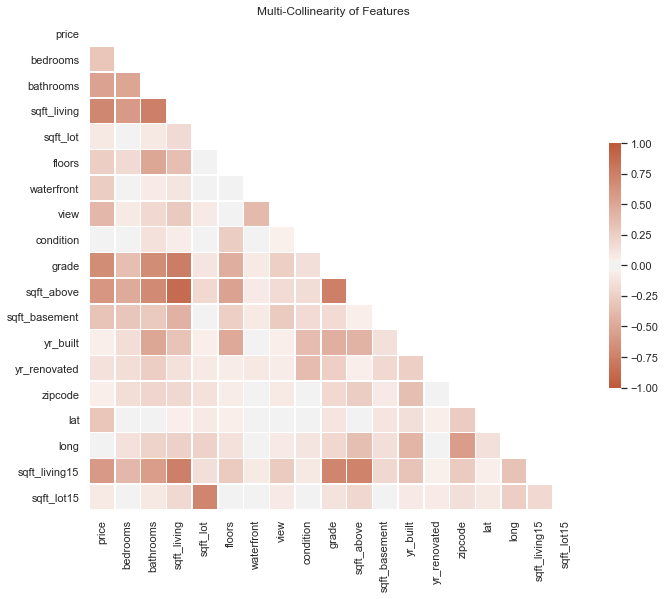

In [132]:
sns.set(style="white")

corr = df.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(22, 22,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=1, vmin=-1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')
#plt.savefig('correlation2.png')

## Mapping Data

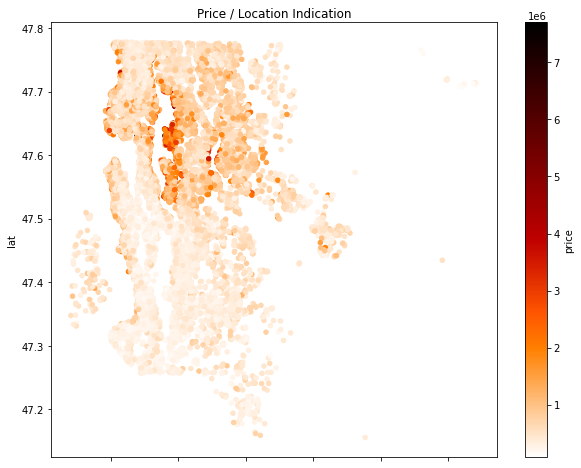

In [69]:
df.plot(kind="scatter", x="long", c="price", y="lat", figsize=(10, 8), 
             cmap="gist_heat_r", colorbar=True, title="Price / Location Indication");
plt.show();

In [142]:

fig = px.scatter(df, x="long", y="lat", 
                 color="price", 
                 hover_data=['price'],
                 title="Price / Location Indication")

fig.show()

In [144]:
#documentation: https://plotly.com/python/reference/densitymapbox/
import plotly.express as px
fig = px.density_mapbox(df, lat='lat', lon='long', z='price', radius=2,
                        center=dict(lat=47.5, lon=-122.2), zoom=8.2, opacity=1, 
                        mapbox_style="open-street-map")
fig.show()

## scatter plots

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Users/jonasjaenicke/opt/anaconda3/envs/nf/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The colNum attrib

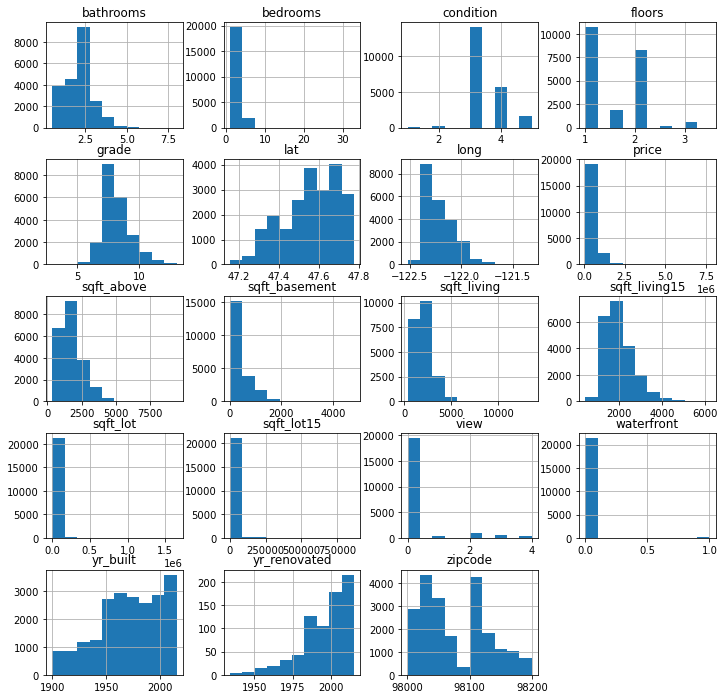

In [40]:
df.hist(figsize=(12,12));

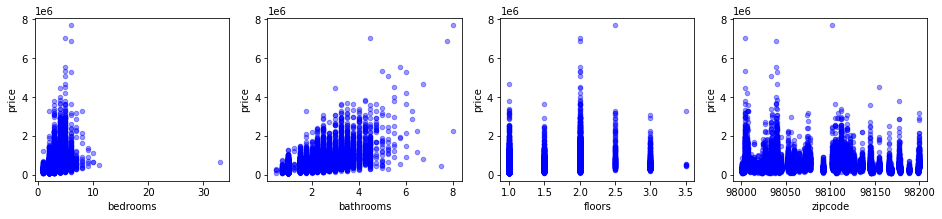

In [41]:
inspect = ['bedrooms', 'bathrooms', 'floors', 'zipcode']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

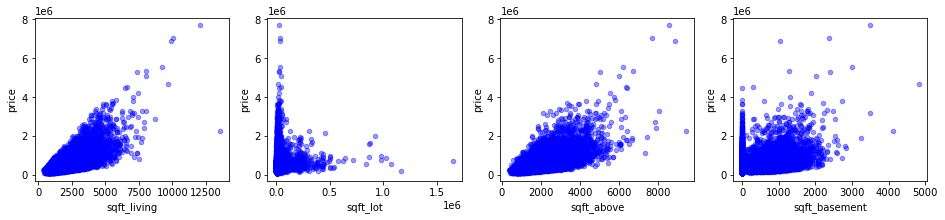

In [42]:
inspect = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


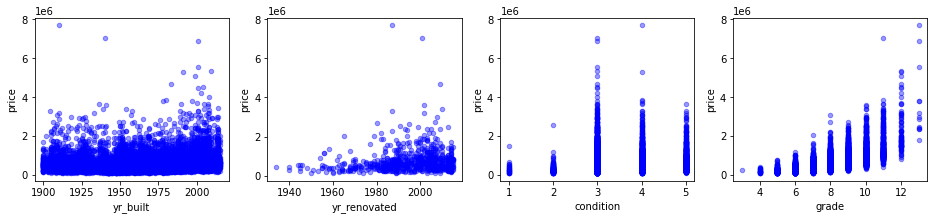

In [43]:
inspect = ['yr_built', 'yr_renovated', 'condition', 'grade']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(inspect, axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


## Pairplots

In [72]:
continuous_var

['date',
 'price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'yr_renovated',
 'floors']

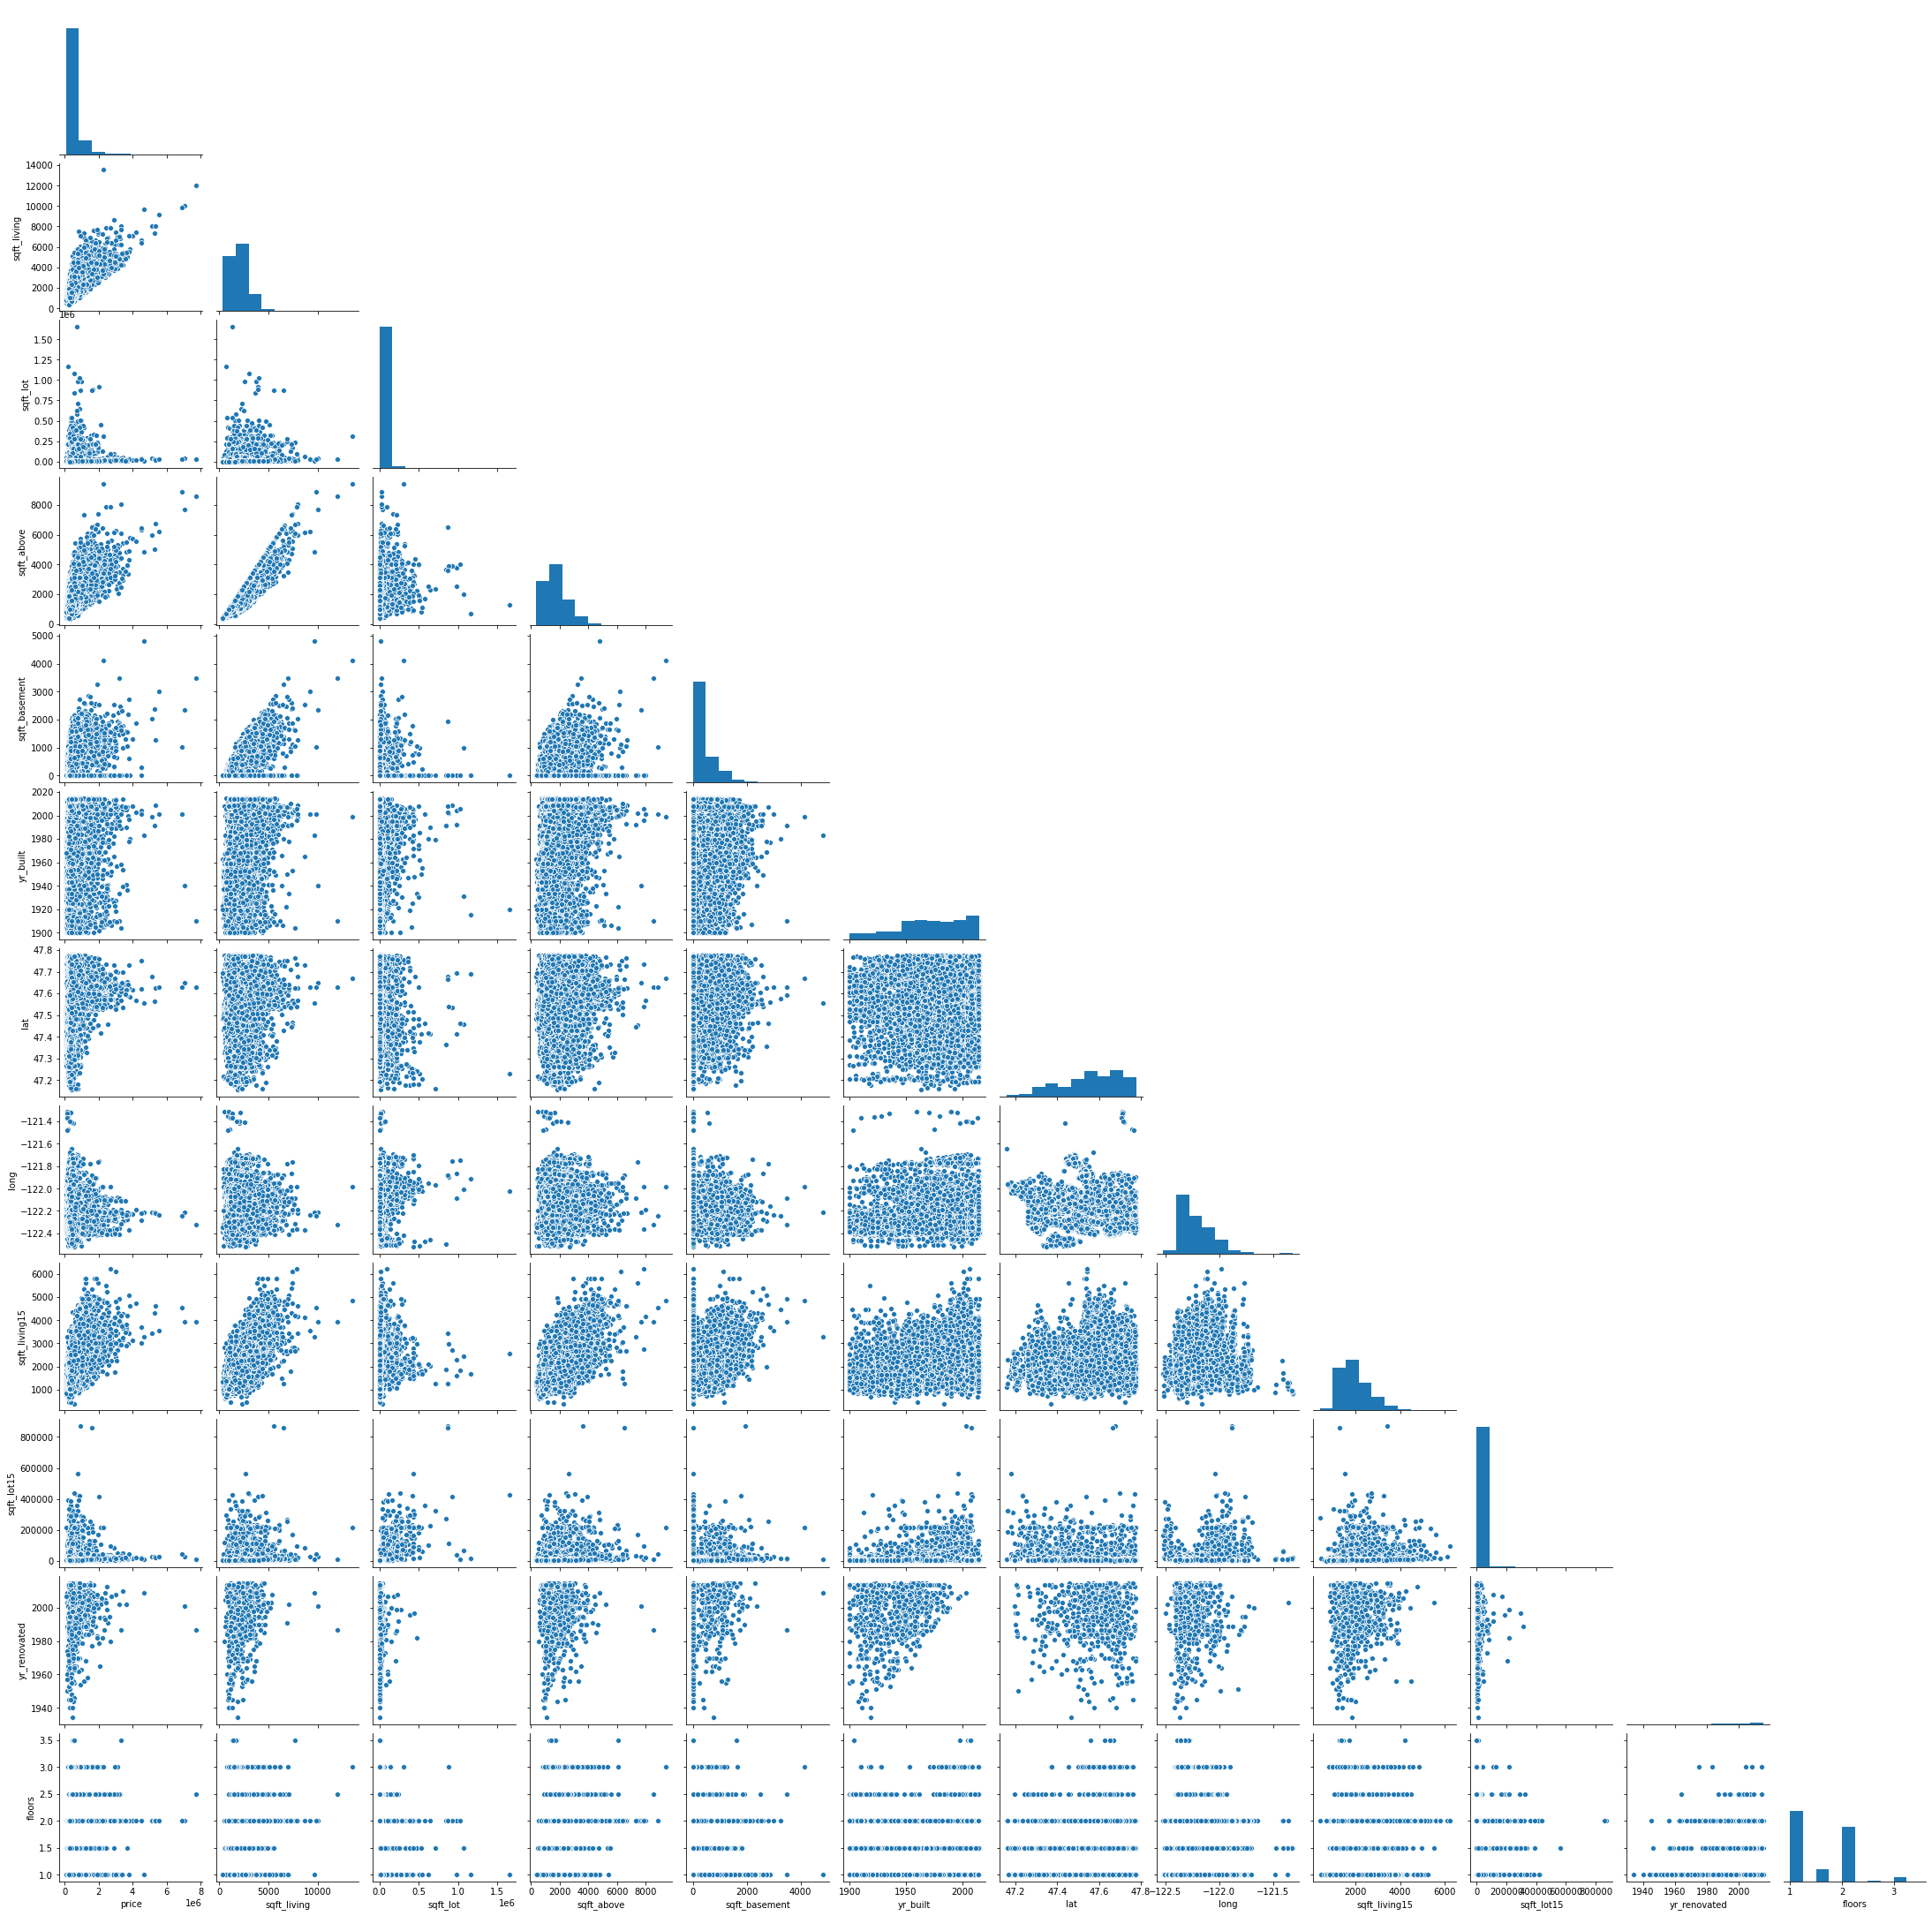

In [71]:
scope = df[continuous_var]
sns.pairplot(scope,corner=True, diag_kind = "hist");

In [45]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.264306 -0.002127   0.063629     0.104637  0.021459  0.020797   
view           0.393497  0.078354   0.186016     0.281715  0.075054  0.028414   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
sqft_basement  0.325008  0.302683   0.282693     0.434576  0.015533 -0.245144   
yr_built       0.053953  0.155670   0.507173     0.318152  0.052946  0.489193   
yr_renovated   0.125499  0.156142   0.253306     0.132791 -0.082031  0.059870   
zipcode       -0.053402 -0.154092  -0.204786    -0.199802 -0.129586 -0.059541   
lat            0.306692 -0.009951   0.024280     0.052155 -0.085514  0.049239   
long           0.022036  0.132054   0.224903     0.241214  0.230227  0.125943   
sqft_living15  0.585241  0.393406   0.569884     0.756402  0.144763  0.280102   
sqft_lot15     0.082845  0.030690   0.088303     0.184342  0.718204 -0.010722   

               waterfront      view  condition     grade  sqft_above  \
price            0.264306  0.393497   0.036056  0.667951    0.605368   
bedrooms        -0.002127  0.078354   0.026496  0.356563    0.479386   
bathrooms        0.063629  0.186016  -0.126479  0.665838    0.686668   
sqft_living      0.104637  0.281715  -0.059445  0.762779    0.876448   
sqft_lot         0.021459  0.075054  -0.008830  0.114731    0.184139   
floors           0.020797  0.028414  -0.264075  0.458794    0.523989   
waterfront       1.000000  0.380543   0.016648  0.082818    0.071778   
view             0.380543  1.000000   0.045622  0.249082    0.166017   
condition        0.016648  0.045622   1.000000 -0.146896   -0.158904   
grade            0.082818  0.249082  -0.146896  1.000000    0.756073   
sqft_above       0.071778  0.166017  -0.158904  0.756073    1.000000   
sqft_basement    0.084949  0.275440   0.170972  0.168023   -0.052293   
yr_built        -0.024487 -0.054452  -0.361592  0.447865    0.424037   
yr_renovated    -0.093519 -0.059121  -0.362244  0.242323    0.052690   
zipcode          0.028923  0.085059   0.002888 -0.185771   -0.261570   
lat             -0.012157  0.006321  -0.015102  0.113575   -0.001199   
long            -0.037628 -0.077702  -0.105877  0.200341    0.344842   
sqft_living15    0.083823  0.278928  -0.093072  0.713867    0.731767   
sqft_lot15       0.030658  0.073083  -0.003126  0.120981    0.195077   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.325008  0.053953      0.125499 -0.053402  0.306692   
bedrooms            0.302683  0.155670      0.156142 -0.154092 -0.009951   
bathrooms           0.282693  0.507173      0.253306 -0.204786  0.024280   
sqft_living         0.434576  0.318152      0.132791 -0.199802  0.052155   
sqft_lot            0.015533  0.052946     -0.082031 -0.129586 -0.085514   
floors             -0.245144  0.489193      0.059870 -0.059541  0.049239   
waterfront          0.084949 -0.024487     -0.093519  0.028923 -0.012157   
view                0.275440 -0.054452     -0.059121  0.085059  0.006321   
condition           0.170972 -0.361592     -0.362244  0.002888 -0.015102   
grade               0.168023  0.447865      0.242323 -0.185771  0.113575   
sqft_above         -0.052293  0.424037      0.052690 -0.261570 -0.001199   
sqft_basement       1.000000 -0.132844      

## Correlation Scatterplots

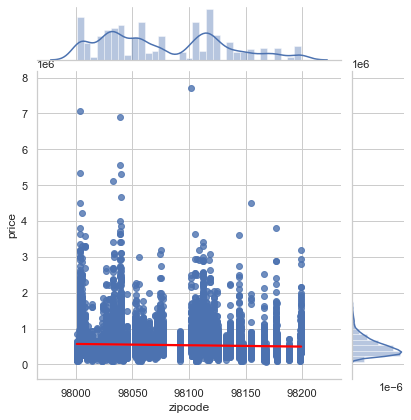

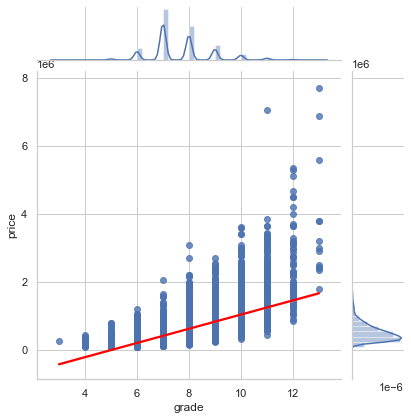

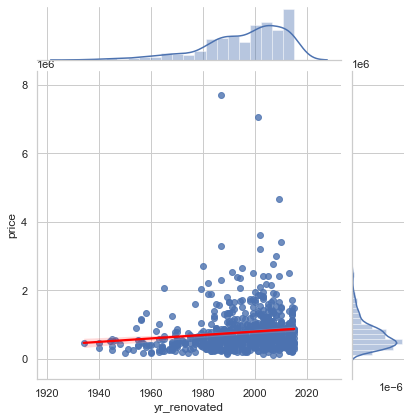

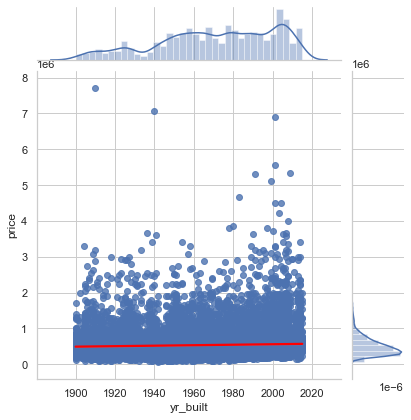

In [159]:
investigation_var = ['zipcode', 'grade', 'yr_renovated', 'yr_built']
for column_name in investigation_var:
        sns.jointplot(x=column_name, y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

# Feature Engneering

## `is_renovated`

<AxesSubplot:ylabel='Frequency'>

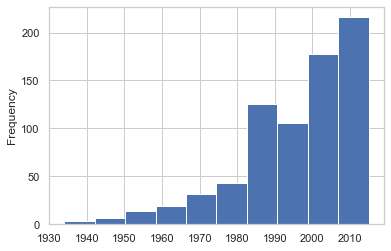

In [197]:
df.yr_renovated.plot(kind='hist')

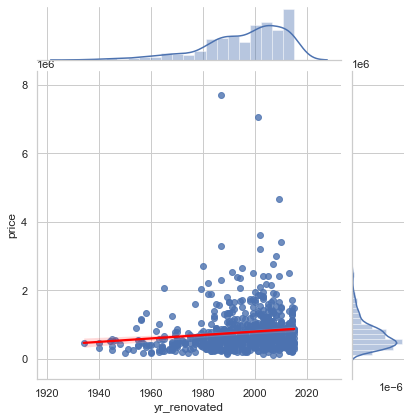

In [198]:
sns.jointplot(x='yr_renovated', y="price", data=df, dropna=True,
                          kind='reg', joint_kws={'line_kws': {'color': 'red'}})

In [193]:

def set_renovated(row):
    return 1 if row['yr_renovated'] > 0 else 0

df['is_renovated'] = df.apply(set_renovated, axis=1)
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
7129300520 2014-10-13  221900.0         3       1.00         1180      5650   
6414100192 2014-12-09  538000.0         3       2.25         2570      7242   
5631500400 2015-02-25  180000.0         2       1.00          770     10000   
2487200875 2014-12-09  604000.0         4       3.00         1960      5000   
1954400510 2015-02-18  510000.0         3       2.00         1680      8080   

            floors  waterfront  view  condition  ...  sqft_above  \
id                                               ...               
7129300520     1.0         0.0   0.0          3  ...        1180   
6414100192     2.0         0.0   0.0          3  ...        2170   
5631500400     1.0         0.0   0.0          3  ...         770   
2487200875     1.0         0.0   0.0          5  ...        1050   
1954400510     1.0         0.0   0.0          3  ...        1680   

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520            0.0      1955           NaN    98178  47.5112 -122.257   
6414100192          400.0      1951        1991.0    98125  47.7210 -122.319   
5631500400            0.0      1933           NaN    98028  47.7379 -122.233   
2487200875          910.0      1965           NaN    98136  47.5208 -122.393   
1954400510            0.0      1987           NaN    98074  47.6168 -122.045   

            sqft_living15  sqft_lot15  is_renovated  
id                                                   
7129300520           1340        5650             0  
6414100192           1690        7639             1  
5631500400           2720        8062             0  
2487200875           1360        5000             0  
1954400510           1800        7503             0  

[5 rows x 21 columns]

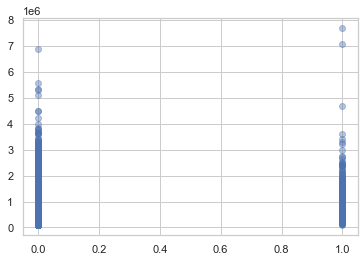

In [204]:
plt.scatter(x='is_renovated', y='price', data=df, alpha=0.4);

## Add sells_per_zipcode coloumn

### MUSS NOCH VERÄNDERT WERDEN!!

In [ ]:
df2 = df
zipcode_data = df2.groupby('zipcode').aggregate(np.mean)
zipcode_data.reset_index(inplace=True)

df2['sells_per_zipcode'] = 1
count_houses_zipcode = df2.groupby('zipcode').sum()
count_houses_zipcode.reset_index(inplace=True)
count_houses_zipcode = count_houses_zipcode[['zipcode','sells_per_zipcode']]
df2.drop(['sells_per_zipcode'], axis = 1, inplace = True)


zipcode_data = zipcode_data.join(count_houses_zipcode.set_index('zipcode'), on='zipcode')

zipcode_data.head().T

## Zip Code Binning

# Predictive Modeling

## OLS Model

In [163]:
ols_results = []
if len(ols_results) != 1:
    ols_results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]

In [164]:
features_to_investigate = ['grade', 'bedrooms', 'bathrooms', 'house_age', 'yr_since_renovation', 'sqft_above',
            'sqft_living15', 'sqft_lot15', 'zipcode']

In [165]:
def run_ols_regression(store_results, data, target, feature, show_plots=False):
    """
    Run ols model, prints model summary, displays plot_regress_exog and qqplot
    
    :param data: dataset
    :param target: target feature name
    :param feature: feature name
    :return:
    """
    
    formula = target + '~' + feature
    model = ols(formula=formula, data=data).fit()

    df = pd.DataFrame({feature: [data[feature].min(), data[feature].max()]})
    pred = model.predict(df)

    if show_plots:
        print('Regression Analysis and Diagnostics for formula: ', formula)
        print('\n')

        fig = plt.figure(figsize=(16, 8))
        fig = sm.graphics.plot_regress_exog(model, feature, fig=fig)
        plt.show();

        residuals = model.resid
        fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
        fig.show();
    
    # append all information to results
    store_results.append([feature, model.rsquared, model.params[0], model.params[0],
                        model.pvalues[1], sms.jarque_bera(model.resid)[0]])


In [167]:
for feature in features:
    run_ols_regression(ols_results, dataset_ols, 'price', feature)

NameError: name 'ols' is not defined

# Data Visualisation

# Archiv

In [107]:
def display_heatmap(data):
    """
    Display a heatmap from a given dataset
    :param data: dataset
    :return: g (graph to display)
    """

    # Set the style of the visualization
    # sns.set(style = "white")
    sns.set_style("white")

    # Create a covariance matrix
    corr = data.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = None

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 12))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    g = sns.heatmap(corr, cmap=cmap, mask=mask, square=True)

    return g

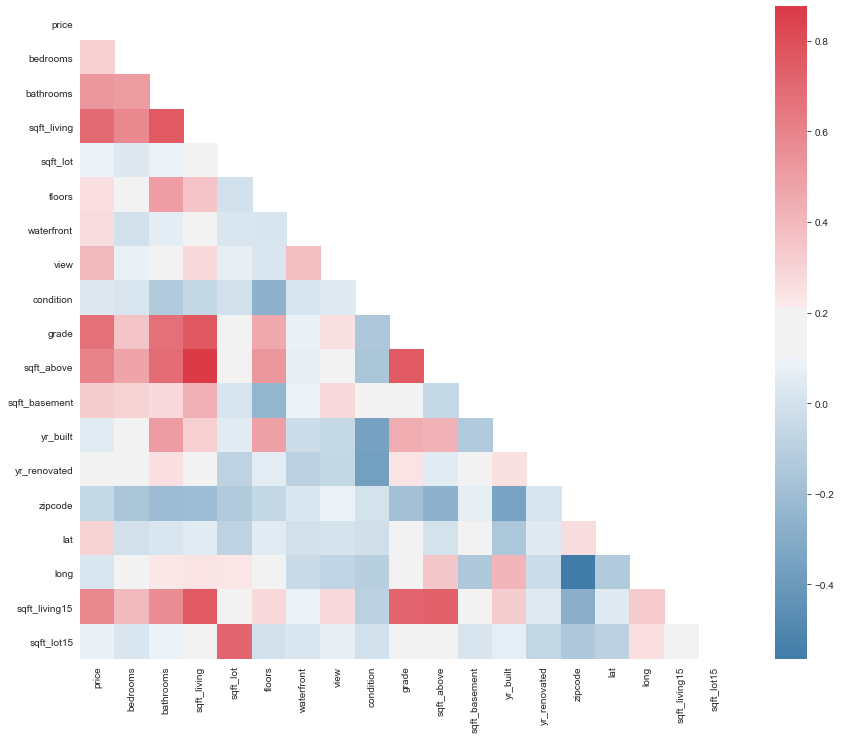

In [74]:

display_heatmap(df);